<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

### Regression and Classification with the Ames Housing Data

---

You have just joined a new "full stack" real estate company in Ames, Iowa. The strategy of the firm is two-fold:
- Own the entire process from the purchase of the land all the way to sale of the house, and anything in between.
- Use statistical analysis to optimize investment and maximize return.

The company is still small, and though investment is substantial the short-term goals of the company are more oriented towards purchasing existing houses and flipping them as opposed to constructing entirely new houses. That being said, the company has access to a large construction workforce operating at rock-bottom prices.

This project uses the [Ames housing data recently made available on kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Estimating the value of homes from fixed characteristics.

---

Your superiors have outlined this year's strategy for the company:
1. Develop an algorithm to reliably estimate the value of residential houses based on *fixed* characteristics.
2. Identify characteristics of houses that the company can cost-effectively change/renovate with their construction team.
3. Evaluate the mean dollar value of different renovations.

Then we can use that to buy houses that are likely to sell for more than the cost of the purchase plus renovations.

Your first job is to tackle #1. You have a dataset of housing sale data with a huge amount of features identifying different aspects of the house. The full description of the data features can be found in a separate file:

    housing.csv
    data_description.txt
    
You need to build a reliable estimator for the price of the house given characteristics of the house that cannot be renovated. Some examples include:
- The neighborhood
- Square feet
- Bedrooms, bathrooms
- Basement and garage space

and many more. 

Some examples of things that **ARE renovate-able:**
- Roof and exterior features
- "Quality" metrics, such as kitchen quality
- "Condition" metrics, such as condition of garage
- Heating and electrical components

and generally anything you deem can be modified without having to undergo major construction on the house.

---

**Your goals:**
1. Perform any cleaning, feature engineering, and EDA you deem necessary.
- Be sure to remove any houses that are not residential from the dataset.
- Identify **fixed** features that can predict price.
- Train a model on pre-2010 data and evaluate its performance on the 2010 houses.
- Characterize your model. How well does it perform? What are the best estimates of price?

> **Note:** The EDA and feature engineering component to this project is not trivial! Be sure to always think critically and creatively. Justify your actions! Use the data description file!

In [2]:
# Load the data
house = pd.read_csv('/Users/Mahendra/desktop/GA/hw/Project3/housing.csv')
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#inspect the columns
house.columns

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish',

In [4]:
house.shape

(1460, 81)

In [5]:
# to find unique values in every columns
for item in house:
    print item
    print house[item].nunique()

Id
1460
MSSubClass
15
MSZoning
5
LotFrontage
110
LotArea
1073
Street
2
Alley
2
LotShape
4
LandContour
4
Utilities
2
LotConfig
5
LandSlope
3
Neighborhood
25
Condition1
9
Condition2
8
BldgType
5
HouseStyle
8
OverallQual
10
OverallCond
9
YearBuilt
112
YearRemodAdd
61
RoofStyle
6
RoofMatl
8
Exterior1st
15
Exterior2nd
16
MasVnrType
4
MasVnrArea
327
ExterQual
4
ExterCond
5
Foundation
6
BsmtQual
4
BsmtCond
4
BsmtExposure
4
BsmtFinType1
6
BsmtFinSF1
637
BsmtFinType2
6
BsmtFinSF2
144
BsmtUnfSF
780
TotalBsmtSF
721
Heating
6
HeatingQC
5
CentralAir
2
Electrical
5
1stFlrSF
753
2ndFlrSF
417
LowQualFinSF
24
GrLivArea
861
BsmtFullBath
4
BsmtHalfBath
3
FullBath
4
HalfBath
3
BedroomAbvGr
8
KitchenAbvGr
4
KitchenQual
4
TotRmsAbvGrd
12
Functional
7
Fireplaces
4
FireplaceQu
5
GarageType
6
GarageYrBlt
97
GarageFinish
3
GarageCars
5
GarageArea
441
GarageQual
5
GarageCond
5
PavedDrive
3
WoodDeckSF
274
OpenPorchSF
202
EnclosedPorch
120
3SsnPorch
20
ScreenPorch
76
PoolArea
8
PoolQC
3
Fence
4
MiscFeature
4
MiscV

In [6]:
house.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [7]:
house['sq_ft']=house['TotalBsmtSF']+house['GrLivArea']

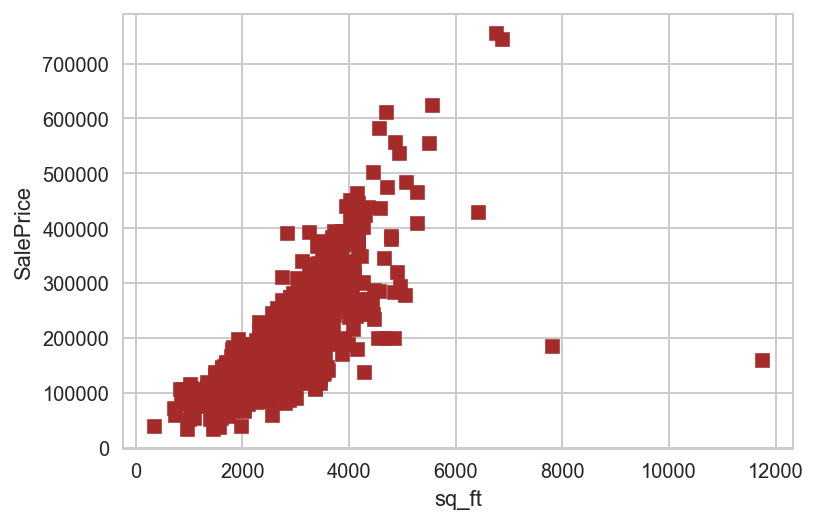

In [8]:
plt.scatter(house.sq_ft, house.SalePrice, c = "brown", marker = "s")

plt.xlabel("sq_ft")
plt.ylabel("SalePrice")
plt.show()

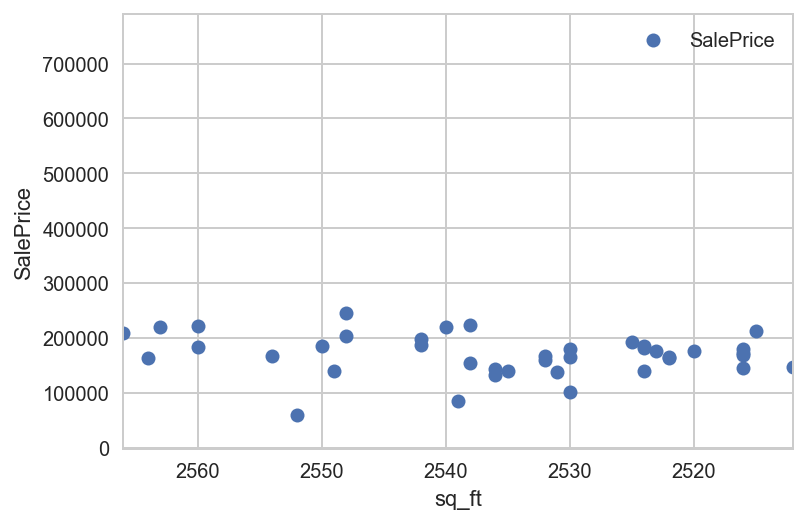

In [9]:
ax = house.plot(x= 'sq_ft', y="SalePrice", style="o") 
ax.set_ylabel("SalePrice")

In [10]:
#house=house.drop('GrLivArea',axis=1,inplace=True)
#house=house.drop('TotalBsmtSF',axis=1,inplace=True)


In [11]:
# Find most important features relative to target
print("Find most important features relative to target")
corr = house.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

Find most important features relative to target
SalePrice        1.000000
OverallQual      0.790982
sq_ft            0.778959
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      

In [12]:
house.Neighborhood.unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

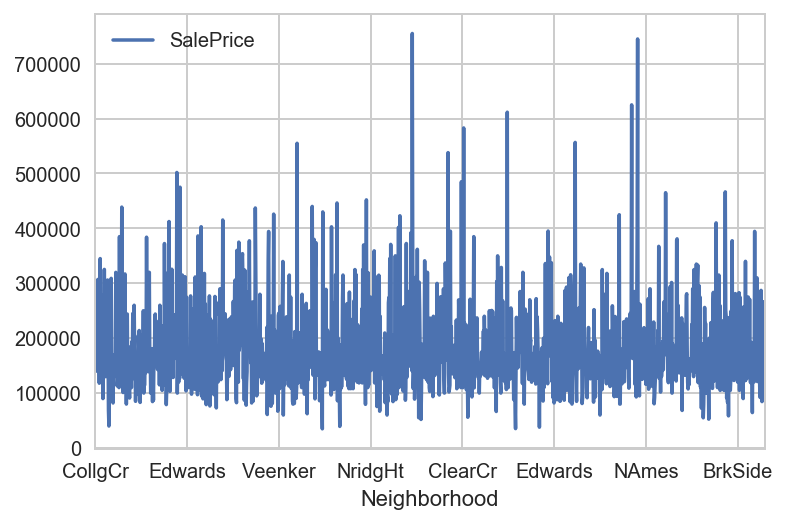

In [13]:
house.plot(x='Neighborhood',y='SalePrice')

In [14]:
#total number of bathrooms
house["TotalBath"] = house["BsmtFullBath"] + (0.5 * house["BsmtHalfBath"]) + \
house["FullBath"] + (0.5 * house["HalfBath"])

In [15]:
house.TotRmsAbvGrd.unique()

array([ 8,  6,  7,  9,  5, 11,  4, 10, 12,  3,  2, 14])

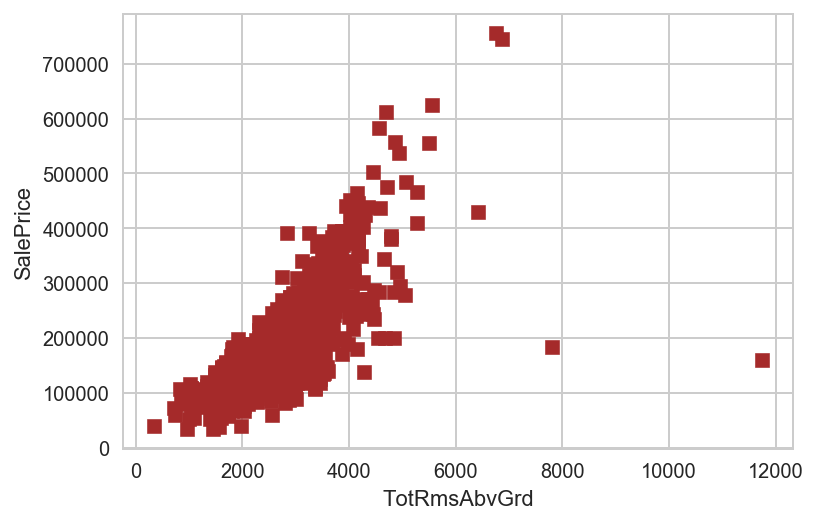

In [16]:
plt.scatter(house.sq_ft, house.SalePrice, c = "brown", marker = "s")

plt.xlabel("TotRmsAbvGrd")
plt.ylabel("SalePrice")
plt.show()

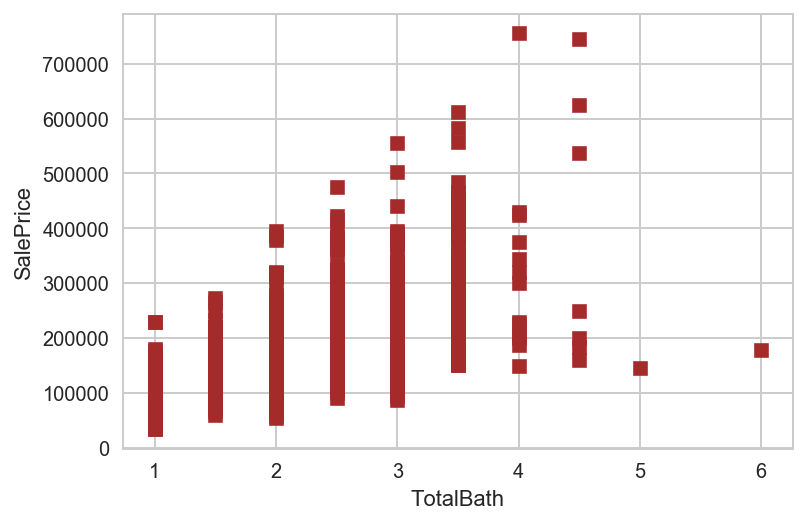

In [17]:
plt.scatter(house.TotalBath, house.SalePrice, c = "brown", marker = "s")

plt.xlabel("TotalBath")
plt.ylabel("SalePrice")
plt.show()

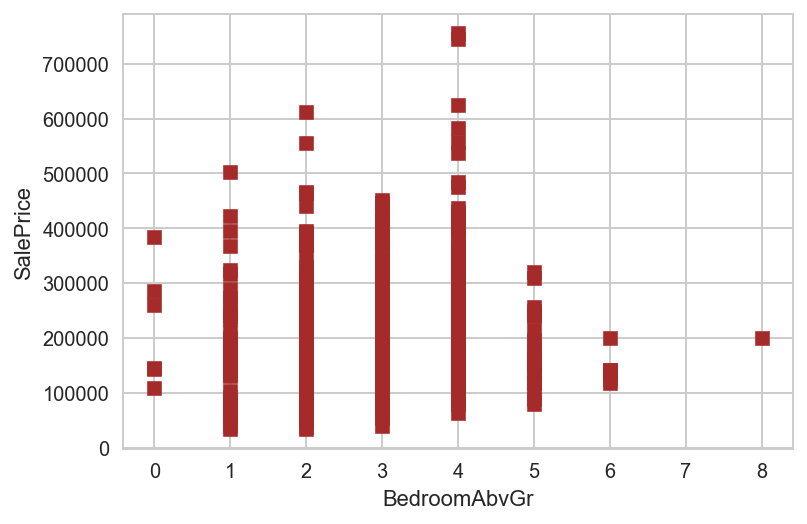

In [18]:
plt.scatter(house.BedroomAbvGr, house.SalePrice, c = "brown", marker = "s")

plt.xlabel("BedroomAbvGr")
plt.ylabel("SalePrice")
plt.show()


{'boxes': [<matplotlib.lines.Line2D at 0x11f0dacd0>],
 'caps': [<matplotlib.lines.Line2D at 0x11f0c39d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x11f08cd10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11f319050>],
 'whiskers': [<matplotlib.lines.Line2D at 0x11f0dad90>,
  <matplotlib.lines.Line2D at 0x11f0c3f50>]}

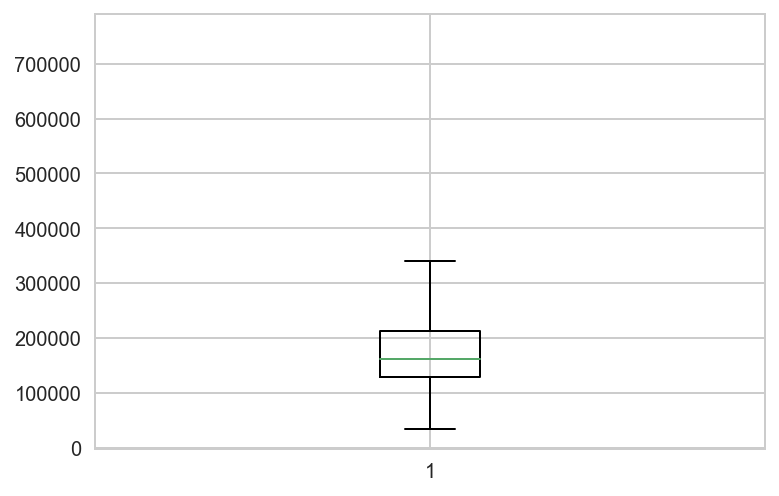

In [19]:
fig = plt.figure() 
plt.boxplot(house.SalePrice)

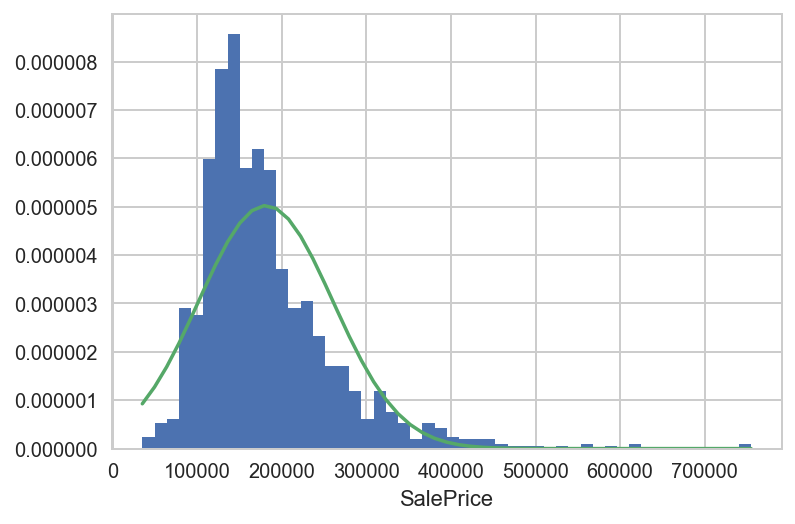

In [20]:
#Distribution of saleprice
import matplotlib.mlab as mlab
n, bins, patches = plt.hist(house.SalePrice, 50, normed=1)
mu = np.mean(house.SalePrice)
sigma = np.std(house.SalePrice)
plt.plot(bins, mlab.normpdf(bins, mu, sigma)) 
plt.xlabel("SalePrice")

In [21]:
# Columns were dropped for which data conversion was done.
clean_house= house.drop('YearBuilt', 1)
clean_house = house.drop('YearRemodAdd', 1)
clean_house = house.drop('GarageYrBlt', 1)
clean_house = house.drop('YrSold', 1)
clean_house = house.drop('Id', 1)


In [22]:
clean_house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,sq_ft,TotalBath
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,0,2,2008,WD,Normal,208500,2566,3.5
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,NaN,0,5,2007,WD,Normal,181500,2524,2.5
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,0,9,2008,WD,Normal,223500,2706,3.5
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,0,2,2006,WD,Abnorml,140000,2473,2.0
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,NaN,0,12,2008,WD,Normal,250000,3343,3.5


In [23]:
#list of columns was prepared which incuded all the attributes having missing values along with the count of missing
#values and later list was sorted. 
val_miss_col = clean_house.isnull().sum(axis = 0)
val_miss_col.sort(axis=0, ascending=False, kind='quicksort', na_position='last', inplace=True)
val_miss_col

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageYrBlt        81
GarageCond         81
GarageType         81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
LotConfig           0
RoofStyle           0
BsmtFinSF1          0
MSZoning            0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
YearRemodAdd        0
                 ... 
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
PoolArea            0
Fireplaces          0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
GarageCars          0
Functional          0
TotalBsmtSF         0
GrLivArea 

In [24]:
clean_house.columns

Index([u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea', u'Street',
       u'Alley', u'LotShape', u'LandContour', u'Utilities', u'LotConfig',
       u'LandSlope', u'Neighborhood', u'Condition1', u'Condition2',
       u'BldgType', u'HouseStyle', u'OverallQual', u'OverallCond',
       u'YearBuilt', u'YearRemodAdd', u'RoofStyle', u'RoofMatl',
       u'Exterior1st', u'Exterior2nd', u'MasVnrType', u'MasVnrArea',
       u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual', u'BsmtCond',
       u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1', u'BsmtFinType2',
       u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF', u'Heating', u'HeatingQC',
       u'CentralAir', u'Electrical', u'1stFlrSF', u'2ndFlrSF', u'LowQualFinSF',
       u'GrLivArea', u'BsmtFullBath', u'BsmtHalfBath', u'FullBath',
       u'HalfBath', u'BedroomAbvGr', u'KitchenAbvGr', u'KitchenQual',
       u'TotRmsAbvGrd', u'Functional', u'Fireplaces', u'FireplaceQu',
       u'GarageType', u'GarageYrBlt', u'GarageFinish', u'GarageCars'

In [25]:
# #missing values for categorical attributes were replaced by zero. 
# # missing value for quantitative variables were replacecd by mean of that column.
#clean_house['poolQC'].fillna((clean_house['poolQC'].mean()),inplace=True) 
clean_house['PoolQC'].fillna(value = 0, inplace=True)
clean_house['MiscFeature'].fillna(value = 0, inplace=True)
#clean_house[some_list].fillna(value = 0, inplace=True)
clean_house['Alley'].fillna(value = 0, inplace=True) 
clean_house['Fence'].fillna(value = 0, inplace=True)
clean_house['FireplaceQu'].fillna(value = 0, inplace=True) 
clean_house['LotFrontage'].fillna((clean_house['LotFrontage'].mean()), inplace=True)
clean_house['GarageType'].fillna(value = 0, inplace=True) 
clean_house['GarageCond'].fillna(value = 0, inplace=True)
clean_house['GarageQual'].fillna(value = 0, inplace=True) 
clean_house['GarageYrBlt'].fillna((clean_house['GarageYrBlt'].mean()), inplace=True)
clean_house['GarageFinish'].fillna(value = 0, inplace=True) 
clean_house['BsmtFinType2'].fillna(value = 0, inplace=True)
clean_house['BsmtExposure'].fillna(value = 0, inplace=True)
clean_house['BsmtFinType1'].fillna(value = 0, inplace=True) 
clean_house['BsmtQual'].fillna(value = 0, inplace=True) 
clean_house['BsmtCond'].fillna(value = 0, inplace=True)
clean_house['MasVnrType'].fillna(value = 0, inplace=True)
clean_house['MasVnrArea'].fillna(value = 0, inplace=True)
clean_house['Electrical'].fillna(value = 0, inplace=True) 

In [26]:
#A list was prepared in which all the categorical variables were included and later this list was passed to prepare
# dummy variables.A dataframe for training data set was finalized was was to be used for furtherr regression analysis.
list_1 = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'GarageType', 'MiscFeature', 'SaleType', 'SaleCondition'] 
list_2 = ['LotShape', 'Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence']
list_3 = ['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold']
full_list = list_1+list_2+ list_3 


In [27]:
#train matrix full train.head
train_data = pd.get_dummies(clean_house,columns =full_list, drop_first = True) 
train_data.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageYrBlt_2005.0,GarageYrBlt_2006.0,GarageYrBlt_2007.0,GarageYrBlt_2008.0,GarageYrBlt_2009.0,GarageYrBlt_2010.0,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
0,65.0,8450,196.0,706,0,150,856,856,854,0,...,0,0,0,0,0,0,0,1,0,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,...,0,0,0,0,0,0,1,0,0,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,...,0,0,0,0,0,0,0,1,0,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,...,0,0,0,0,0,0,0,0,0,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,...,0,0,0,0,0,0,0,1,0,0


In [28]:
train_data.columns

Index([u'LotFrontage', u'LotArea', u'MasVnrArea', u'BsmtFinSF1', u'BsmtFinSF2',
       u'BsmtUnfSF', u'TotalBsmtSF', u'1stFlrSF', u'2ndFlrSF', u'LowQualFinSF',
       ...
       u'GarageYrBlt_2005.0', u'GarageYrBlt_2006.0', u'GarageYrBlt_2007.0',
       u'GarageYrBlt_2008.0', u'GarageYrBlt_2009.0', u'GarageYrBlt_2010.0',
       u'YrSold_2007', u'YrSold_2008', u'YrSold_2009', u'YrSold_2010'],
      dtype='object', length=560)

In [29]:
#Columns were dropped for which data conversion was done. 
#t = pd.read_csv('test.csv')
#t = train_data.drop('Id', 1) 
#t = train_data.drop('YearBuilt', 1)
# t = t.drop('YearRemodAdd', 1)
# t = t.drop('GarageYrBlt', 1) 
# t = t.drop('YrSold', 1)
# t.head()

In [30]:
#list of columns was prepared which incuded all the attributes having missing values #along with the count of missing 
#values and later list was sorted.
cols_having_missing_test = train_data.isnull().sum(axis = 0) 
cols_having_missing_test.sort(axis=0, ascending=False, kind='quicksort', na_position='last', inplace=True) 
print cols_having_missing_test[:40]

YrSold_2010              0
SaleType_WD              0
LotShape_IR2             0
SaleCondition_Partial    0
SaleCondition_Normal     0
SaleCondition_Family     0
SaleCondition_Alloca     0
SaleCondition_AdjLand    0
SaleType_Oth             0
LotShape_Reg             0
SaleType_New             0
SaleType_ConLw           0
SaleType_ConLI           0
SaleType_ConLD           0
SaleType_Con             0
SaleType_CWD             0
LotShape_IR3             0
Utilities_NoSeWa         0
YrSold_2009              0
OverallQual_8            0
OverallCond_5            0
OverallCond_4            0
OverallCond_3            0
OverallCond_2            0
OverallQual_10           0
OverallQual_9            0
OverallQual_7            0
LandSlope_Mod            0
OverallQual_6            0
OverallQual_5            0
OverallQual_4            0
OverallQual_3            0
OverallQual_2            0
LandSlope_Sev            0
MiscFeature_TenC         0
MiscFeature_Shed         0
MiscFeature_Othr         0
E

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


In [31]:
# missing values for categorical attributes were replaced by zero.
# missing value for quantitative variables were replacecd by mean of that column.
clean_house['PoolQC'].fillna(value = 0, inplace=True)
clean_house['MiscFeature'].fillna(value = 0, inplace=True) 
clean_house['Alley'].fillna(value = 0, inplace=True) 
clean_house['Fence'].fillna(value = 0, inplace=True)
clean_house['FireplaceQu'].fillna(value = 0, inplace=True)
clean_house['LotFrontage'].fillna((clean_house['LotFrontage'].mean()), inplace=True)
clean_house['GarageType'].fillna(value = 0, inplace=True)
clean_house['GarageCond'].fillna(value = 0, inplace=True)
clean_house['GarageQual'].fillna(value = 0, inplace=True)
#clean_house['GarageYrBlt'].fillna(value = 0, inplace=True) 
clean_house['GarageFinish'].fillna(value = 0, inplace=True)
clean_house['BsmtFinType2'].fillna(value = 0, inplace=True) 
clean_house['BsmtExposure'].fillna(value = 0, inplace=True)
clean_house['BsmtFinType1'].fillna(value = 0, inplace=True)
clean_house['BsmtFinType2'].fillna(value = 0, inplace=True)
clean_house['BsmtQual'].fillna(value = 0, inplace=True)
clean_house['BsmtCond'].fillna(value = 0, inplace=True) 
clean_house['MasVnrType'].fillna(value = 0, inplace=True)
clean_house['MasVnrArea'].fillna(value = 0, inplace=True) 
clean_house['Electrical'].fillna(value = 0, inplace=True)
clean_house['MSZoning'].fillna(value = 0, inplace=True)
clean_house['BsmtHalfBath'].fillna(value = 0, inplace=True)
clean_house['Utilities'].fillna(value = 0, inplace=True)
clean_house['Functional'].fillna(value = 0, inplace=True)
clean_house['BsmtFullBath'].fillna(value = 0, inplace=True) 
clean_house['BsmtFinSF2'].fillna(value = 0, inplace=True) 
clean_house['BsmtFinSF1'].fillna(value = 0, inplace=True)
clean_house['BsmtUnfSF'].fillna(value = 0, inplace=True) 
clean_house['TotalBsmtSF'].fillna(value = 0, inplace=True)
clean_house['Exterior2nd'].fillna(value = 0, inplace=True) 
clean_house['SaleType'].fillna(value = 0, inplace=True)
clean_house['Exterior1st'].fillna(value = 0, inplace=True)
clean_house['KitchenQual'].fillna(value = 0, inplace=True)
clean_house['GarageArea'].fillna(value = 0, inplace=True)
clean_house['GarageCars'].fillna(value = 0, inplace=True) 
clean_house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,sq_ft,TotalBath
0,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,Inside,...,0,0,0,2,2008,WD,Normal,208500,2566,3.5
1,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,FR2,...,0,0,0,5,2007,WD,Normal,181500,2524,2.5
2,60,RL,68.0,11250,Pave,0,IR1,Lvl,AllPub,Inside,...,0,0,0,9,2008,WD,Normal,223500,2706,3.5
3,70,RL,60.0,9550,Pave,0,IR1,Lvl,AllPub,Corner,...,0,0,0,2,2006,WD,Abnorml,140000,2473,2.0
4,60,RL,84.0,14260,Pave,0,IR1,Lvl,AllPub,FR2,...,0,0,0,12,2008,WD,Normal,250000,3343,3.5


In [39]:
#Earlier list of categorical variables was used to prepare dummy variables.
#A dataframe for training data set was finalized was was to be used for furtherr regression analysis.
test = pd.get_dummies(clean_house, columns = full_list, drop_first = True) 
test.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageYrBlt_2005.0,GarageYrBlt_2006.0,GarageYrBlt_2007.0,GarageYrBlt_2008.0,GarageYrBlt_2009.0,GarageYrBlt_2010.0,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
0,65.0,8450,196.0,706,0,150,856,856,854,0,...,0,0,0,0,0,0,0,1,0,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,...,0,0,0,0,0,0,1,0,0,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,...,0,0,0,0,0,0,0,1,0,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,...,0,0,0,0,0,0,0,0,0,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,...,0,0,0,0,0,0,0,1,0,0


In [33]:
#The columns in training dataset and test dataset should be aligned before passing values.
#The regression analysis should be performed on mutually inclusive attributes. 
#Hence datarames were to me maded identical before proceeding further.
listtrain_1 = [col for col in train_data.columns if col!= 'SalePrice']
listtrain_1 
listtest_1 = [col for col in test.columns if col!= 'SalePrice']
listtest_1
diff = list(set(listtest_1) - set(listtrain_1))
diff1 = list(set(listtrain_1) - set(listtest_1))
difference = diff + diff1 #Mutually exclusive ariables were dropped from both dataframes.
train_data.drop(diff1,inplace=True,axis=1) #b
test.drop(diff,inplace=True,axis=1) #t1

In [34]:
#Basic regression analysis was performed. 
#output was obained in the array of intercept and coeficients.
from sklearn.linear_model import LinearRegression
collist = [col for col in train_data.columns if col != 'SalePrice']
X = train_data[collist].values
y = train_data[['SalePrice']] 
lr = LinearRegression()
lr.fit(X, y)
print (lr.intercept_, lr.coef_) 

(array([ -8.28869075e+09]), array([[  6.83524131e+01,   6.82301663e-01,   1.53072199e+01,
         -1.86744597e+12,  -1.86744597e+12,  -1.86744597e+12,
         -6.64601993e+12,   1.50737453e+12,   1.50737453e+12,
          1.50737453e+12,  -1.00208404e+13,   9.76498406e+11,
          4.88249203e+11,   9.76498406e+11,   4.88249203e+11,
         -3.25390458e+03,  -4.05398971e+03,   1.61038962e+03,
          7.48202680e+03,   4.40512780e+03,   1.47783203e+01,
          1.52646484e+01,   2.12782288e+00,   1.65501709e+01,
          5.11103516e+01,   5.01448975e+01,   5.25314453e+02,
         -1.01245117e+00,  -3.05529479e+02,   8.51346590e+12,
         -9.76498402e+11,  -7.87607770e+03,  -4.72239383e+03,
         -1.50683229e+04,  -5.06716286e+03,   4.26748209e+03,
         -1.62574162e+03,  -4.20455030e+04,  -1.06688028e+04,
         -1.52129807e+04,   2.82052270e+09,  -1.24146932e+04,
         -6.16960905e+03,  -1.68252600e+04,   2.61680692e+04,
          4.34283170e+04,   2.59037413e+04

In [35]:
#Trend for residuals against fitted values was observed to understand the effect of corelated input variables.
def residuals_vs_fitted(fitted, residuals, xlabel, ylabel): 
    plt.subplot(111)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.scatter(fitted, residuals)
    polyline = np.poly1d(np.polyfit(fitted, residuals, 2))
    # model non-linearity with quadratic
    xs = range(int(np.min(fitted)), int(np.max(fitted)))
    plt.plot(xs, polyline(xs), color='r', linewidth=2.5) 
def qq_plot(residuals):
    sm.qqplot(residuals)
def standardize(xs):
    xmean = np.mean(xs)
    xstd = np.std(xs) 
    return (xs - xmean) / xstd
    fitted = reg2.predict(X) 
    residuals = y - fitted 
    std_residuals = standardize(residuals) 
    residuals_vs_fitted(fitted, residuals, "Fitted", "Residuals")

In [36]:
#Ordinary least sqaure regression analysis was performed. 
import statsmodels.api as sm
collist = [col for col in train_data.columns if col!= 'SalePrice'] 
X = train_data[collist].values
X = sm.add_constant(X) 
 
 



In [37]:
# add the intercept term
y = train_data["SalePrice"].values
ols = sm.OLS(y, X).fit() 
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     32.13
Date:                Sat, 29 Apr 2017   Prob (F-statistic):               0.00
Time:                        11:37:09   Log-Likelihood:                -16361.
No. Observations:                1460   AIC:                         3.380e+04
Df Residuals:                     919   BIC:                         3.666e+04
Df Model:                         540                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const      -4.279e+05   6.11e+04     -6.999      0.000     -5.48e+05 -3.08e+05
x1            68.4067     49.925      1.370      0.171       -29.574   166.388
x2             0.6829      0.128      5.349      0.000         0.432     0.934
x3            15.2305      6.405      2.378      0.018         2.660    27.801
x4            10.7965      3.439      3.139      0.002         4.047    17.546
x5             2.9903      6.709      0.446      0.656       -10.175    16.156
x6            -6.4597      3.392     -1.905      0.057       -13.116     0.197
x7             7.3270      4.283      1.711      0.088        -1.079    15.734
x8             3.9911      9.648      0.414      0.679       -14.944    22.926
x9            26.5732      7.823      3.397      0.001        11.220    41.926
x10          -15.3168     19.702     -0.777      0.437       -53.984    23.350
x11           15.2474      5.802      2.628      0.009         3.861    26.634
x12          917.9678   1766.758      0.520      0.603     -2549.381  4385.316
x13          475.0059   3227.978      0.147      0.883     -5860.058  6810.070
x14          981.7894   1931.414      0.508      0.611     -2808.705  4772.284
x15          352.7274   2202.968      0.160      0.873     -3970.704  4676.158
x16        -3253.7503   1733.852     -1.877      0.061     -6656.519   149.019
x17        -4050.5275   8337.318     -0.486      0.627     -2.04e+04  1.23e+04
x18         1610.2290   1112.947      1.447      0.148      -573.983  3794.441
x19         7482.7725   3010.990      2.485      0.013      1573.558  1.34e+04
x20         4404.1750   2705.989      1.628      0.104      -906.461  9714.811
x21           14.7726      9.462      1.561      0.119        -3.797    33.343
x22           15.2748      6.732      2.269      0.024         2.063    28.487
x23            2.1279     13.397      0.159      0.874       -24.164    28.419
x24           16.5357     15.352      1.077      0.282       -13.593    46.664
x25           51.1099     24.947      2.049      0.041         2.150   100.070
x26           50.1457     14.358      3.493      0.001        21.968    78.323
x27          525.3364    253.979      2.068      0.039        26.891  1023.782
x28           -1.0219      7.600     -0.134      0.893       -15.937    13.893
x29         -305.5307    289.119     -1.057      0.291      -872.941   261.879
x30           22.5745      3.602      6.268      0.000        15.506    29.643
x31         2313.6238   1429.268      1.619      0.106      -491.384  5118.632
x32        -7876.6962   6818.879     -1.155      0.248     -2.13e+04  5505.686
x33        -4720.4947    2.2e+04     -0.215      0.830     -4.79e+04  3.85e+04
x34        -1.507e+04   3.24e+04     -0.466      0.642     -7.86e+04  4.84e+04
x35        -5067.3593   1.09e+04     -0.465      0.642     -2.64e+04  1.63e+04
x3

In [38]:
#Test data was passed into regression model to prredict the sale pricce of houses for test data.
#output was obtained in the format of array which included intercept (beto 0) and coeficients.
SalePrice_test = lr.predict(test) 
SalePrice_test

ValueError: shapes (1460,560) and (559,1) not aligned: 560 (dim 1) != 559 (dim 0)

In [41]:
#Samples were formed for performing two tailed two sample Z test to understand the difference in means. 
train_new = train_data
print train_new.shape


(1460, 560)


In [43]:
train_new.tail()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageYrBlt_2005.0,GarageYrBlt_2006.0,GarageYrBlt_2007.0,GarageYrBlt_2008.0,GarageYrBlt_2009.0,GarageYrBlt_2010.0,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
1455,62.0,7917,0.0,0,0,953,953,953,694,0,...,0,0,0,0,0,0,1,0,0,0
1456,85.0,13175,119.0,790,163,589,1542,2073,0,0,...,0,0,0,0,0,0,0,0,0,1
1457,66.0,9042,0.0,275,0,877,1152,1188,1152,0,...,0,0,0,0,0,0,0,0,0,1
1458,68.0,9717,0.0,49,1029,0,1078,1078,0,0,...,0,0,0,0,0,0,0,0,0,1
1459,75.0,9937,0.0,830,290,136,1256,1256,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
# train_new.drop('1460', 0)
# print train_new.shape

TypeError: cannot perform reduce with flexible type

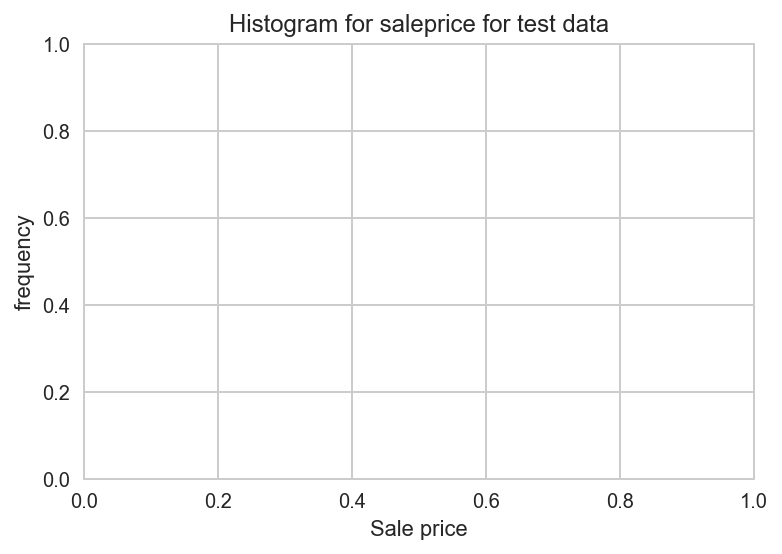

In [45]:
# histogram for saleprice for test data was plotted.
bins = [0, 25000, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000]
plt.title("Histogram for saleprice for test data") 
plt.xlabel('Sale price', fontsize=11)
plt.ylabel('frequency', fontsize=11)
plt.hist(SalePrice_test, bins, histtype = 'bar', width = 0.8)

(array([   0.,    5.,  109.,  501.,  410.,  210.,  110.,   59.,   28.,
          14.,    5.]),
 array([     0,  25000,  50000, 100000, 150000, 200000, 250000, 300000,
        350000, 400000, 450000, 500000]),
 <a list of 11 Patch objects>)

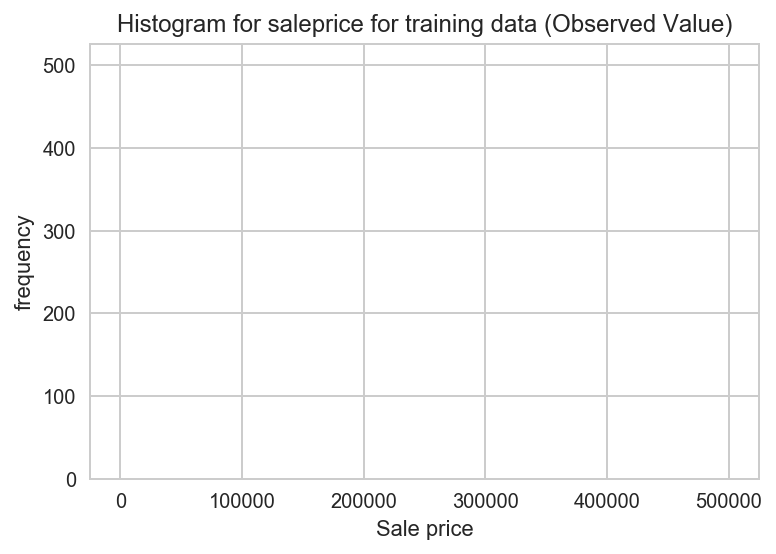

In [47]:
 
#Histogram for saleprice for training data (Observed Value) was plotted.
bins = [0, 25000, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000] 
plt.title("Histogram for saleprice for training data (Observed Value)")
plt.xlabel('Sale price', fontsize=11)
plt.ylabel('frequency', fontsize=11)
plt.hist(train_data.SalePrice, bins, histtype = 'bar', width = 0.8)

In [48]:
#modules for statistical analyses were imported. 
from sklearn.linear_model import Ridge 
from sklearn.linear_model import Lasso 
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import f_regression 
from sklearn.metrics import mean_squared_error 
from sklearn.cross_validation import KFold 

//anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [50]:
 #Advanced regression techniques were performed and RMSE vavlue was obtained.
    #RMSE values for baseline regression, Ridge regression and Lasso regression was obtained.
def cross_validate(X, y, nfolds, reg_name):
    rmses = []
    kfold = KFold(X.shape[0], n_folds=nfolds)
    for train, test in kfold:
        Xtrain, ytrain, Xtest, ytest = X[train], y[train], X[test], y[test]
        reg = None
        if reg_name == "ridge":
            reg = Ridge()
        elif reg_name == "lasso":
            reg = Lasso()
        else:
            reg = LinearRegression() 
        reg.fit(Xtrain, ytrain)
        ypred = reg.predict(Xtest)
        rmses.append(np.sqrt(mean_squared_error(ytest, ypred))) 
        return np.mean(rmses)
                

In [53]:
 
collist = [col for col in train_data.columns if col != "SalePrice"]
X = train_data[collist].values 
y = train_data["SalePrice"].values

In [54]:
rmse_baseline = cross_validate(X, y, 1458, "baseline") 
rmse_ridge = cross_validate(X, y, 1458, "ridge") 
rmse_lasso = cross_validate(X, y, 1458, "lasso")
(rmse_baseline, rmse_ridge, rmse_lasso)


//anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


(21814.729654150527, 15783.747497606646, 20355.04254184946)

In [55]:
# CSV file including results was read for performing two sample Z test.
# ztest = pd.read_csv('Z_test.csv')
# ztest.head(1) 
ztest=test

In [58]:
# two sample Z test was peprformedd.


train_mean = ztest.SalePrice.mean()
test_mean = ztest.Prediction.mean()
train_std = np.std(ztest.SalePrice)
#test_std = np.std(ztest.Prediction)
train_mean = ztest.SalePrice.mean()
test_mean = ztest.Prediction.mean()
train_std = np.std(ztest.SalePrice)
#test_std = np.std(ztest.Prediction) 
train_sample_size = 1460
test_sample_size = 1460
pop_mean_diff = 0 




AttributeError: 'DataFrame' object has no attribute 'Prediction'

In [ ]:
def twoSampZ(X1, X2, mudiff, sd1, sd2, n1, n2):
    from numpy import sqrt, abs, round from scipy.stats 
    import norm
    pooledSE = sqrt(sd1**2/n1 + sd2**2/n2)
    z = ((X1 - X2) - mudiff)/pooledSE
    pval = 2*(1 - norm.cdf(abs(z)))
    return round(z, 3), round(pval, 4) 
 z, p = twoSampZ(train_mean, test_mean, pop_mean_diff, train_std, test_std, train_sample_size, test_sample_size) 
    print "Mean of testing data is",test_mean 
    print "Mean of training data is",train_mean
    print "Standard deviation of testing data is",test_std 
    print "Standard deviation of training data is",train_std 
    print "P value is",p print "Z value is",z


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Determine any value of *changeable* property characteristics unexplained by the *fixed* ones.

---

Now that you have a model that estimates the price of a house based on its static characteristics, we can move forward with part 2 and 3 of the plan: what are the costs/benefits of quality, condition, and renovations?

There are two specific requirements for these estimates:
1. The estimates of effects must be in terms of dollars added or subtracted from the house value. 
2. The effects must be on the variance in price remaining from the first model.

The residuals from the first model (training and testing) represent the variance in price unexplained by the fixed characteristics. Of that variance in price remaining, how much of it can be explained by the easy-to-change aspects of the property?

---

**Your goals:**
1. Evaluate the effect in dollars of the renovate-able features. 
- How would your company use this second model and its coefficients to determine whether they should buy a property or not? Explain how the company can use the two models you have built to determine if they can make money. 
- Investigate how much of the variance in price remaining is explained by these features.
- Do you trust your model? Should it be used to evaluate which properties to buy and fix up?

In [ ]:
# Log transform the target for official scoring
house.SalePrice = np.log1p(house.SalePrice)
y = house.SalePrice

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. What property characteristics predict an "abnormal" sale?

---

The `SaleCondition` feature indicates the circumstances of the house sale. From the data file, we can see that the possibilities are:

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)
       
One of the executives at your company has an "in" with higher-ups at the major regional bank. His friends at the bank have made him a proposal: if he can reliably indicate what features, if any, predict "abnormal" sales (foreclosures, short sales, etc.), then in return the bank will give him first dibs on the pre-auction purchase of those properties (at a dirt-cheap price).

He has tasked you with determining (and adequately validating) which features of a property predict this type of sale. 

---

**Your task:**
1. Determine which features predict the `Abnorml` category in the `SaleCondition` feature.
- Justify your results.

This is a challenging task that tests your ability to perform classification analysis in the face of severe class imbalance. You may find that simply running a classifier on the full dataset to predict the category ends up useless: when there is bad class imbalance classifiers often tend to simply guess the majority class.

It is up to you to determine how you will tackle this problem. I recommend doing some research to find out how others have dealt with the problem in the past. Make sure to justify your solution. Don't worry about it being "the best" solution, but be rigorous.

Be sure to indicate which features are predictive (if any) and whether they are positive or negative predictors of abnormal sales.

In [ ]:
# A: